In [ ]:
# Install Ollama and Huggingface packages
%pip install llama-index-llms-ollama llama-index-embeddings-huggingface llama-index networkx llama-index-graph-stores-neo4j

# 1) General Setup

### Data
Anna is working at UBB, she teaches semantic web, she used to teach databases and conception modelling. <span style="background-color:rgba(226, 86, 22, 0.52)">Teaching is a hard job as it requires to deal with students, long hours and lots of patience. Donkey Kong (...)</span>. UBB is located in Cluj Napoca in Romania.

In [104]:
# Load documents
from llama_index.core import SimpleDirectoryReader

documents = SimpleDirectoryReader('files/test').load_data()
print(documents)

[Document(id_='cd9b96bd-c58b-4de5-8393-0d35c4e199df', embedding=None, metadata={'file_path': '/Users/mirkoschuerlein/Master/2. Semester/Intelligent Systems/Project/code/llm-rag-knowledge-graphs/files/test/lisa1.txt', 'file_name': 'lisa1.txt', 'file_type': 'text/plain', 'file_size': 1955, 'creation_date': '2025-06-26', 'last_modified_date': '2025-06-26'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text="Anna is working at UBB, she teaches semantic web, she used to teach databases and conception modelling. Teaching is a hard job as it requires to deal with students, long hours and lots of patience. Donkey Kong Land, known in Japan as Super Do

### Data Embedding

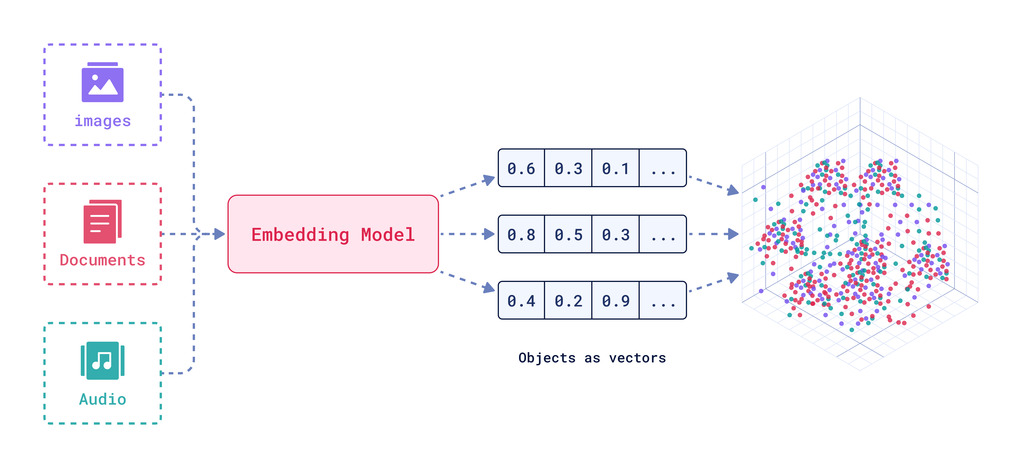

In [105]:
# Set up local embeddings using a Huggingface Model
from llama_index.embeddings.huggingface import HuggingFaceEmbedding

embed_model = HuggingFaceEmbedding(model_name="all-MiniLM-L6-v2")

### Using Local LLMs

In [106]:
# Set up local model
from llama_index.llms.ollama import Ollama

llm = Ollama(model="llama3.2:latest", request_timeout=120)

# 2) RAG using Vector Embeddings

In [107]:
from llama_index.core import VectorStoreIndex

# Build the index with local embeddings
index = VectorStoreIndex.from_documents(documents, embed_model=embed_model)

# Set up query engine using Ollama
query_engine = index.as_query_engine(llm=llm)

# Query the model
response = query_engine.query("Who teaches in romania and what courses do they teach?")
print(response)


According to the given information, Anna teaches at UBB (University of Bucharest) in Cluj Napoca, Romania. However, the provided text does not mention specific courses taught by Anna. It only mentions her previous teaching experiences, which include semantic web, databases, and conception modelling.


# 2) RAG using Knowledge Graphs

### Knowledge Graph Example
Anna is working at UBB, she teaches semantic web, she used to teach databases and conception modelling. <span style="background-color:rgba(226, 86, 22, 0.52)">Teaching is a hard job as it requires to deal with students, long hours and lots of patience. Donkey Kong (...)</span>. UBB is located in Cluj Napoca in Romania.

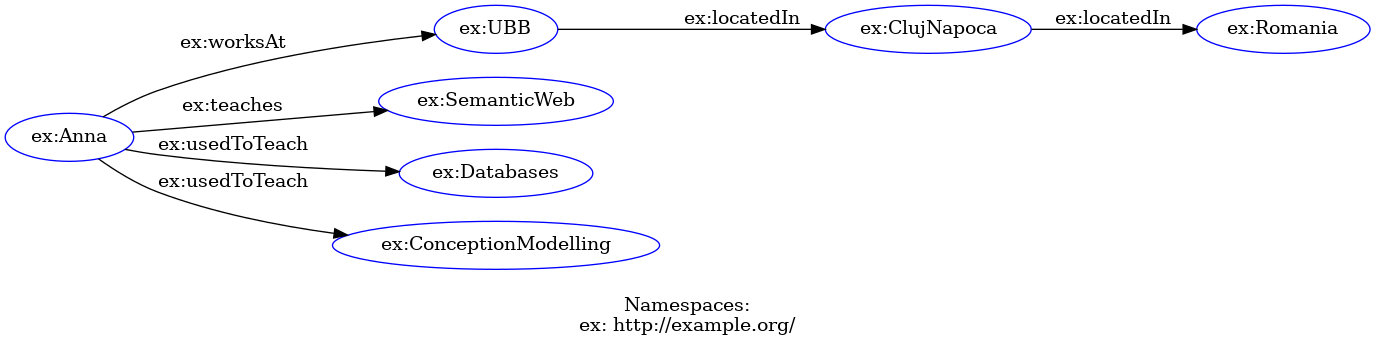

In [111]:
from llama_index.core.indices.knowledge_graph import KnowledgeGraphIndex
from llama_index.core.graph_stores import SimpleGraphStore
from llama_index.core import StorageContext

graph_store = SimpleGraphStore()
storage_context = StorageContext.from_defaults(graph_store=graph_store)

kg_index = KnowledgeGraphIndex.from_documents(
    documents,
    # max_triplets_per_chunk=2,
    storage_context=storage_context,
    include_embeddings=True,
    embed_model=embed_model,
    llm=llm
)

# Set up query engine using Ollama
query_engine = kg_index.as_query_engine(llm=llm)

# Query the model
response = query_engine.query("Who teaches in romania and what courses do they teach?")
print(response)


UBB is located in Cluj Napoca, Romania.

Anna teaches semantic web at UBB. She also used to teach databases and conception modelling.


# Old

In [100]:
from llama_index.core import SimpleDirectoryReader
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core.graph_stores import SimpleGraphStore
from llama_index.core.indices.knowledge_graph import KnowledgeGraphIndex
from llama_index.core.query_engine import RouterQueryEngine
from llama_index.core.tools import QueryEngineTool

# Load documents
documents = SimpleDirectoryReader('files/test').load_data()


# Set up local embeddings (you can specify a different model too)
embed_model = HuggingFaceEmbedding(model_name="all-MiniLM-L6-v2")

# Build Knowledge Graph Index
graph_store = SimpleGraphStore()
kg_index = KnowledgeGraphIndex.from_documents(
    documents,
    graph_store=graph_store,
    embed_model='local',
    llm=llm,
    max_triplets_per_chunk=10
)

# Create query engines
kg_engine = kg_index.as_query_engine(llm=llm)

# Combine into a Router engine
tools = [
    QueryEngineTool.from_defaults(
        query_engine=kg_engine,
        description="Use for fact-based or entity relationship queries."
    )
]
router_engine = RouterQueryEngine.from_defaults(query_engine_tools=tools, llm=llm)

# Query
response = router_engine.query("Who teaches in romania and what courses do they teach?")
print(response)


In Romania, educators with a bachelor's or master's degree in education or a related field typically hold teaching positions. They may also have specialized training in specific subjects or age groups.

Those teaching core subjects like mathematics, science, and languages often possess advanced degrees or certifications in their area of expertise. Additionally, some teachers might have completed teacher training programs or pursued higher education to specialize in certain courses.

Primary and secondary school teachers typically teach a range of courses including Romanian language, history, geography, mathematics, science, and foreign languages like English, French, or German.

Post-secondary educators, such as those at universities and colleges, may instruct courses in various fields like law, business, engineering, humanities, social sciences, and the arts.


VERSION BOTH VECTOR AND KG

In [23]:
# Use local model


from llama_index.llms.ollama import Ollama
llm = Ollama(model="llama3.2:latest", request_timeout=500)

In [24]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core.graph_stores import SimpleGraphStore
from llama_index.core.indices.knowledge_graph import KnowledgeGraphIndex
from llama_index.core.query_engine import RouterQueryEngine
from llama_index.core.tools import QueryEngineTool

# Load documents
documents = SimpleDirectoryReader('files/test').load_data()


# Set up local embeddings (you can specify a different model too)
embed_model = HuggingFaceEmbedding(model_name="all-MiniLM-L6-v2")

# Build Knowledge Graph Index
graph_store = SimpleGraphStore()
kg_index = KnowledgeGraphIndex.from_documents(
    documents,
    graph_store=graph_store,
    embed_model='local',
    llm=llm,
    max_triplets_per_chunk=10
)

# Build the index with local embeddings
vector_index = VectorStoreIndex.from_documents(documents, embed_model=embed_model)

# Create query engines
kg_engine = kg_index.as_query_engine(llm=llm)
vector_engine = vector_index.as_query_engine(llm=llm)

# Combine into a Router engine
tools = [
    QueryEngineTool.from_defaults(
        query_engine=kg_engine,
        description="Use for fact-based or entity relationship queries."
    ),
    QueryEngineTool.from_defaults(
        query_engine=vector_engine,
        description="Use for general or contextual document questions."
    )
]
router_engine = RouterQueryEngine.from_defaults(query_engine_tools=tools, llm=llm)

# Query
response = router_engine.query("Summarize each document in a few sentences.")
print(response)


Document 1:
A collaborative research project has been initiated by two prominent researchers, Dr. Grant and Dr. Reed. Dr. Lisa Grant is a molecular biologist, while Dr. Alan Reed is a data scientist from NovaTech, an AI company based in the U.S. The nature of their collaboration involves data analysis.

Document 2:
Dr. Lisa Grant and Dr. Alan Reed have partnered to work on a research project under BioCore's Emerging Innovations Division. Their collaboration combines expertise from molecular biology and data science, reflecting the interdisciplinary approach often seen in AI-driven research projects.


In [27]:
print(query_engine.query("Who is Lisa Grant and what is she collaborating on?"))

Lisa Grant is an individual with expertise in firefighting. She is currently collaborating with Dr. Alan Reed, a data scientist from NovaTech, on a data analysis project.
